# Maximum likelihood estimation (MLE)

In [ ]:
import numpy as np
from scipy.special import hermite, factorial
from tqdm import tqdm

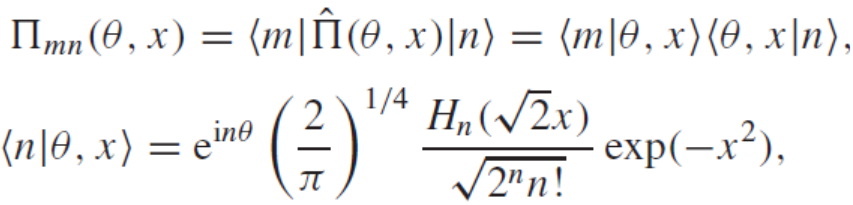

In [14]:

def Pi_mn(theta, x, N):
    """
    Projection operator in the Fock basis Pi_mn(theta,x)

    Inputs:
        theta: Quadrature phase in radians (float).
        x: Quadrature measurement outcome (float).
        N: Dimension cutoff (int).

    Returns:
        Pi: Projection operator (ndarray, shape (N, N))
    """
    # Compute coefficients ⟨m|theta,x⟩ in Fock basis
    coeffs = np.zeros(N, dtype=np.complex128)
    norm = (1 / (np.pi**0.25)) * np.exp(-x**2 / 2)

    for n in range(N):
        Hn = hermite(n)(x)
        coeffs[n] = norm * Hn / np.sqrt(2**n * factorial(n)) * np.exp(-1j * n * theta)

    # Pi_mn = <m | theta, x> <theta, x | n>
    Pi = np.outer(coeffs, np.conjugate(coeffs))
    return Pi

In [12]:
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [ ]:
# Iterative Maximum Likelihood Estimation
def iMLE(thetas, x_values, N, max_iters=100):

    rho = np.eye(N) / N  # initial guess

    for it in tqdm(range(max_iters)):
        R = 0
        for theta, x in zip(thetas, x_values):
            Pi = Pi_mn(x, theta, N)
            p = (rho * Pi).tr().real + 1e-12
            R += (Pi / p)

        rho_new = R * rho * R
        rho_new = rho_new / rho_new.tr()

        delta = (rho_new - rho).norm()
        rho = rho_new

        if delta < 1e-6:
            print(f"Converged at iteration {it}")
            break

    return rho

In [16]:
x_values

NameError: name 'x_values' is not defined

In [10]:
test = Pi_mn(np.deg2rad(15), 0, 12)
test.shape

(12, 12)